<a href="https://colab.research.google.com/github/jane95924/week_7_IP/blob/master/week_7_IP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#DOCUMENTATION



INTRODUCTION


1. Define the question
  
  study the factors that affect housing prices , create a model that predict the sale of prices upon provision of predictor variable.
2. Metrics for success 
  our model will be considered a success if we are able to predict accurately the sale of prices of the houses . listing the factors that affect the prices of the houses is also a success . an accuracy of 80% is good to say we have an accurate prediction. an RMSE of 10% is good for the variable mean.
3. context 

As a data scientist who works for Hass Consulting company which is a real estate leader with over 25 years of experience, you have been tasked to study the factors that affect housing prices using the given information on real estate properties that was collected over the past few months. create a model that wouls allow the company to accuratelt predict the sale of prices upon being provided with the  predictor variable.

       


4. experimental design
      

*   import libraries, load data, clean the data
*   perform EDA


*   perform regression analyis
     1. Multiple Linear Regression
     2. Quantile  Regression
     3. Ridge Rgression
     4. Lasso regression
     5. Elastic Net Regression 
*   provide recommendation based on the analyssis


*   challenge the solution








#DATA LOADING AND INITIAL EXPLORATION

In [1]:
# import the libraries that we will use
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
#loading our uploaded data and previewing the head
house = pd.read_csv('/content/Independent Project Week 7 - house_data.csv')
house.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [3]:
#previewing the tail of or dataset
house.tail(5)

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21608,263000018,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287
21612,1523300157,325000.0,2,0.75,1020,1076,2.0,0,0,3,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357


In [5]:
#checking our data info
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   price          21613 non-null  float64
 2   bedrooms       21613 non-null  int64  
 3   bathrooms      21613 non-null  float64
 4   sqft_living    21613 non-null  int64  
 5   sqft_lot       21613 non-null  int64  
 6   floors         21613 non-null  float64
 7   waterfront     21613 non-null  int64  
 8   view           21613 non-null  int64  
 9   condition      21613 non-null  int64  
 10  grade          21613 non-null  int64  
 11  sqft_above     21613 non-null  int64  
 12  sqft_basement  21613 non-null  int64  
 13  yr_built       21613 non-null  int64  
 14  yr_renovated   21613 non-null  int64  
 15  zipcode        21613 non-null  int64  
 16  lat            21613 non-null  float64
 17  long           21613 non-null  float64
 18  sqft_l

our data has 20 columns and 21613 rows. the data types are appropriate  except  the bathrooms and the floors. having a .5 bathroom is not realistic. we change that to an integer. the same to the floor column



#DATA CLEANING

In [3]:
# changing the data type for the bathroom column
house['bathrooms']= house['bathrooms'].astype('int64')
# chaning the data type for the floors column
house['floors'] = house['floors'].astype('int64')
# printing out our changes 
print('bathrooms;' ,house.bathrooms.dtype)
print('floors;', house.floors.dtype)

bathrooms; int64
floors; int64


the conversion was successful.

In [4]:
#checking null values in the dataset
house.isnull().sum()

id               0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

we have no null values in any of the columns.

In [5]:
# check for duplicates in the data and count them
house.duplicated().count

<bound method Series.count of 0        False
1        False
2        False
3        False
4        False
         ...  
21608    False
21609    False
21610    False
21611    False
21612    False
Length: 21613, dtype: bool>

we have no duplicates in our dataset.

In [6]:
# some columns do not seem relevant to me,  do not need it in answering my question
# the ID column and the last four columns are not needed.
house = house.drop(columns = ['id','lat','long','sqft_living15','sqft_lot15'])
house.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode
0,221900.0,3,1,1180,5650,1,0,0,3,7,1180,0,1955,0,98178
1,538000.0,3,2,2570,7242,2,0,0,3,7,2170,400,1951,1991,98125
2,180000.0,2,1,770,10000,1,0,0,3,6,770,0,1933,0,98028
3,604000.0,4,3,1960,5000,1,0,0,5,7,1050,910,1965,0,98136
4,510000.0,3,2,1680,8080,1,0,0,3,8,1680,0,1987,0,98074


The columns have been dropped

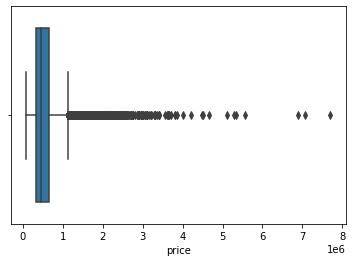

In [11]:
#check for outliers in each column
sns.boxplot(data = house, x='price')

the price of the houses seem close , some of the houses are pricey, but it is allowed, some houses are unique with huge value to them.

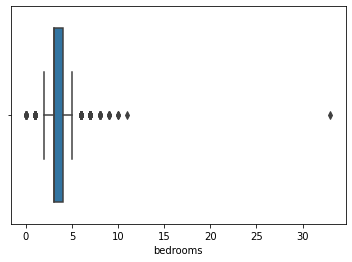

In [13]:
#checking for outliers in the bedroom column
sns.boxplot(data = house, x ='bedrooms')

most of the houses have bedrooms between 0 and 5 , a few have more than 5 to the extreme of over than 30 . people build houses to their preference, the number of bedrooms they decide to have is upto them , i will do nothing to the outlier.

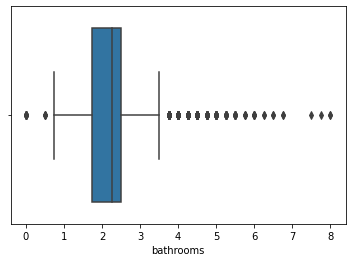

In [14]:
# check for outliers in the bathroom column.
sns.boxplot(data = house, x = 'bathrooms')

most houses have bathrooms between 1 and 3, some have less than one and some have more of upto 8 bathrooms.

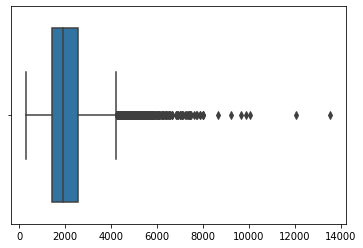

In [18]:
# checking for outliers in square feet area of living area
sns.boxplot(data = house, x = ['sqft_living'])

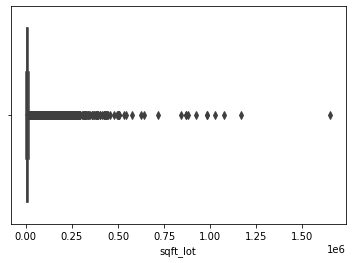

In [19]:
#checking for outliers in square feet area of parking layout
sns.boxplot(data = house, x='sqft_lot')

the size of the parking lot varies with houses, some have big and some have small depending on what they have and preference.

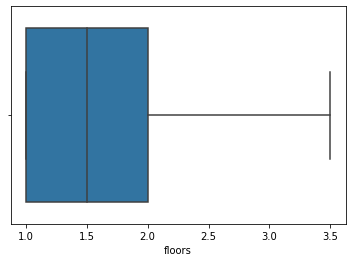

In [20]:
# outliers in the number of floors
sns.boxplot(data= house, x= 'floors')

the houses  have upto two floors. got no outlier.

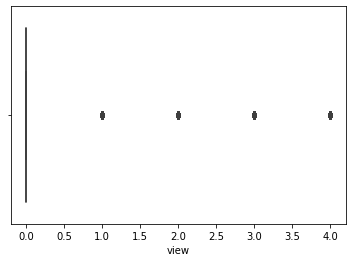

In [22]:
#checking for outliers in views
sns.boxplot(data = house, x= 'view')

different houses have different number of views, some have more than others, we have no common range.

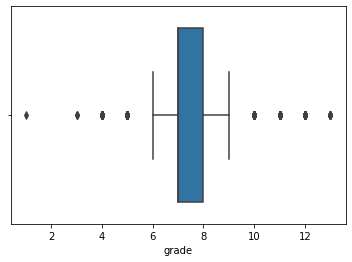

In [24]:
#check for outliers in the grade
sns.boxplot(data = house, x='grade')

most houses are between grade 6 and 8,  a few houses are less than that and some are above 8.

#EDA

<Figure size 1440x1440 with 0 Axes>

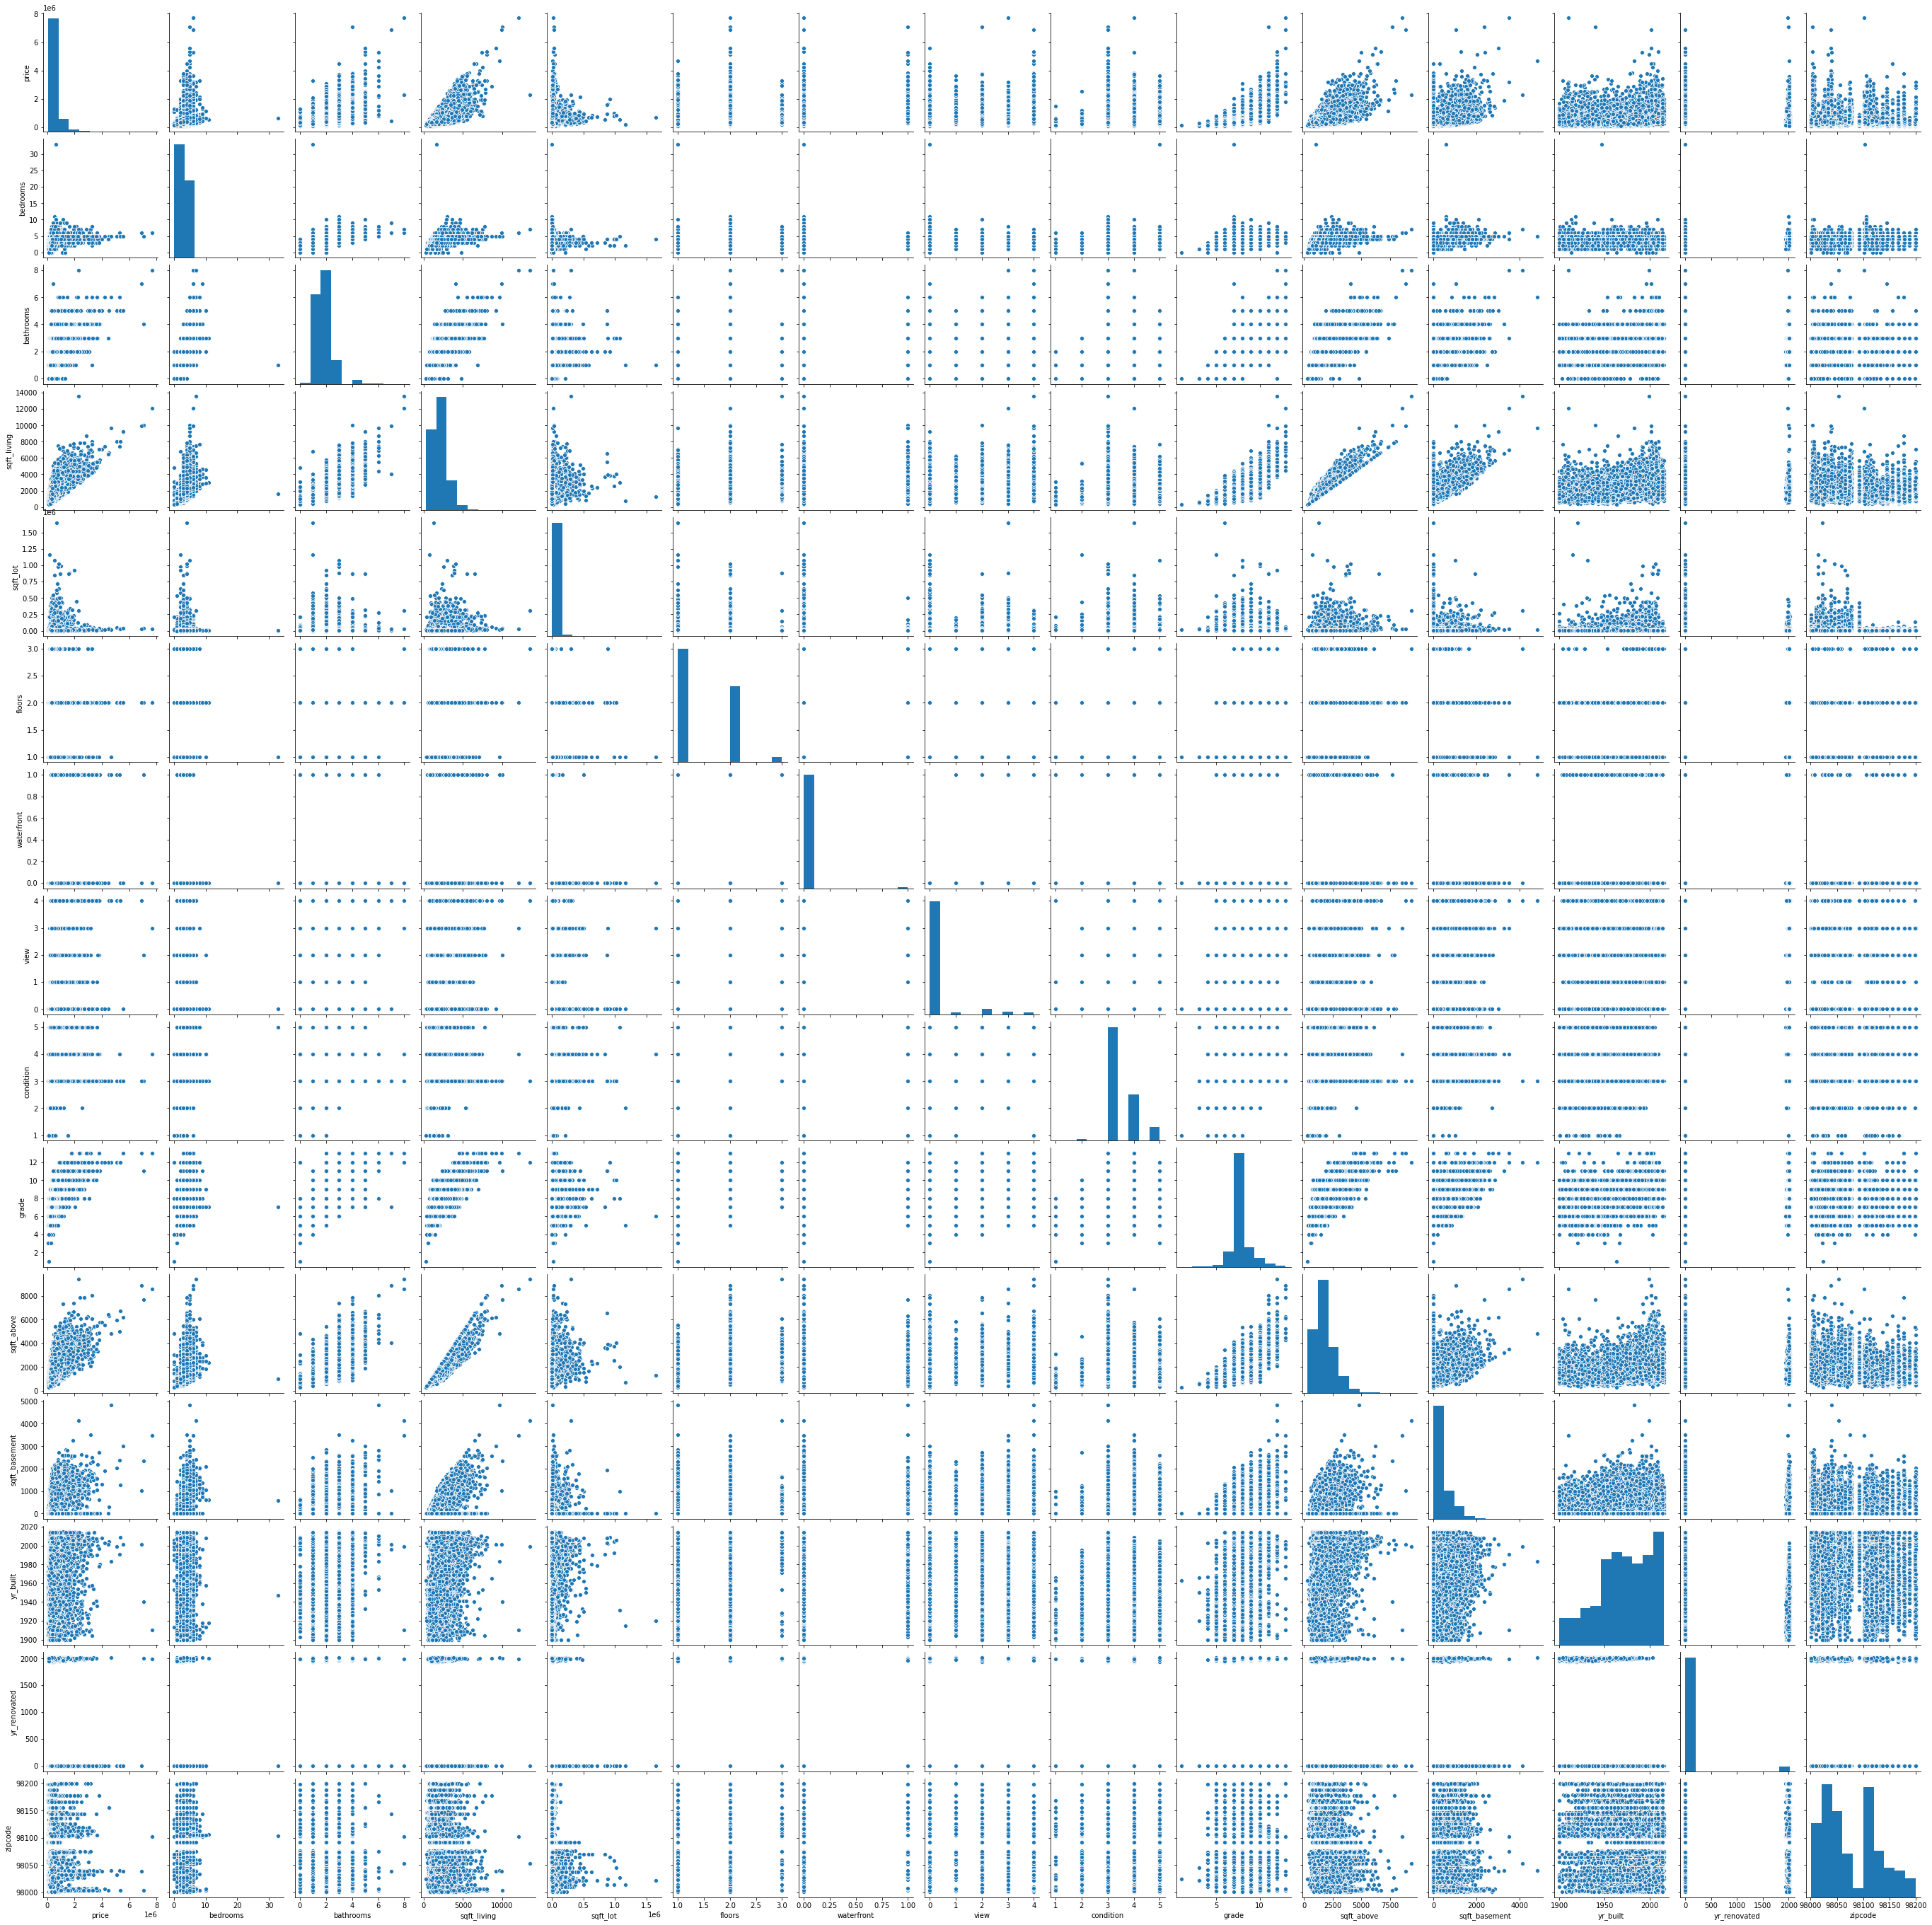

In [7]:
# we use a pairplot to visualise the relaation between our variables.
plt.figure(figsize = (20,20))
sns.pairplot(house)

some variables are linearly related,
price and sqft_living as seen above.
price and sqft_above are also linearly related.



In [8]:
#check the descriptive analysis
corr = house.corr()
corr

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode
price,1.000000,0.308338,0.510082,0.702044,0.089655,0.237207,0.266331,0.397346,0.036392,0.667463,0.605566,0.323837,0.053982,0.126442,-0.053168
bedrooms,0.308338,1.000000,0.467452,0.576671,0.031703,0.155643,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,0.154178,0.018841,-0.152668
bathrooms,0.510082,0.467452,1.000000,0.697875,0.085310,0.484822,0.058798,0.177257,-0.126016,0.606631,0.639933,0.250880,0.433647,0.060436,-0.159773
sqft_living,0.702044,0.576671,0.697875,1.000000,0.172826,0.353321,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,-0.199430
sqft_lot,0.089655,0.031703,0.085310,0.172826,1.000000,-0.008951,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.053080,0.007644,-0.129574
floors,0.237207,0.155643,0.484822,0.353321,-0.008951,1.000000,0.019640,0.024658,-0.293173,0.472608,0.517913,-0.235836,0.578619,-0.007775,-0.096743
waterfront,0.266331,-0.006582,0.058798,0.103818,0.021604,0.019640,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,0.030285
view,0.397346,0.079532,0.177257,0.284611,0.074710,0.024658,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.084827
condition,0.036392,0.028472,-0.126016,-0.058753,-0.008958,-0.293173,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618,0.003026
grade,0.667463,0.356967,0.606631,0.762704,0.113621,0.472608,0.082775,0.251321,-0.144674,1.000000,0.755923,0.168392,0.446963,0.014414,-0.184862


a correlation below 0.5 means a weak correlation and more than 0.5 mean strongly related. sqft_above and bathrooms are strongly related with 0.68.
relation of the variable to itself is 1 on the diagonal as expected. some are inversely related, like the bedrooms and waterfront

3     9824
4     6882
2     2760
5     1601
6      272
1      199
7       38
8       13
0       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64


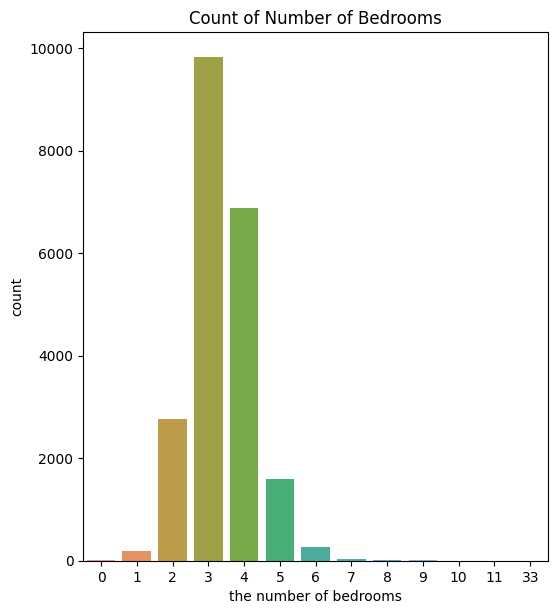

In [34]:
# histogram of the number of bedrooms
plt.figure(figsize = (6,7), dpi=100)
sns.countplot(house['bedrooms'])
plt.xlabel('the number of bedrooms')
plt.ylabel('count')
plt.title('Count of Number of Bedrooms')
print(house.bedrooms.value_counts())

most house have three bedrooms, then 4 bedrooms, 2 bedrooms and 5 bedrooms in that order. houses with more than 9 bedrooms are less. 

1    12590
2     8402
3      621
Name: floors, dtype: int64


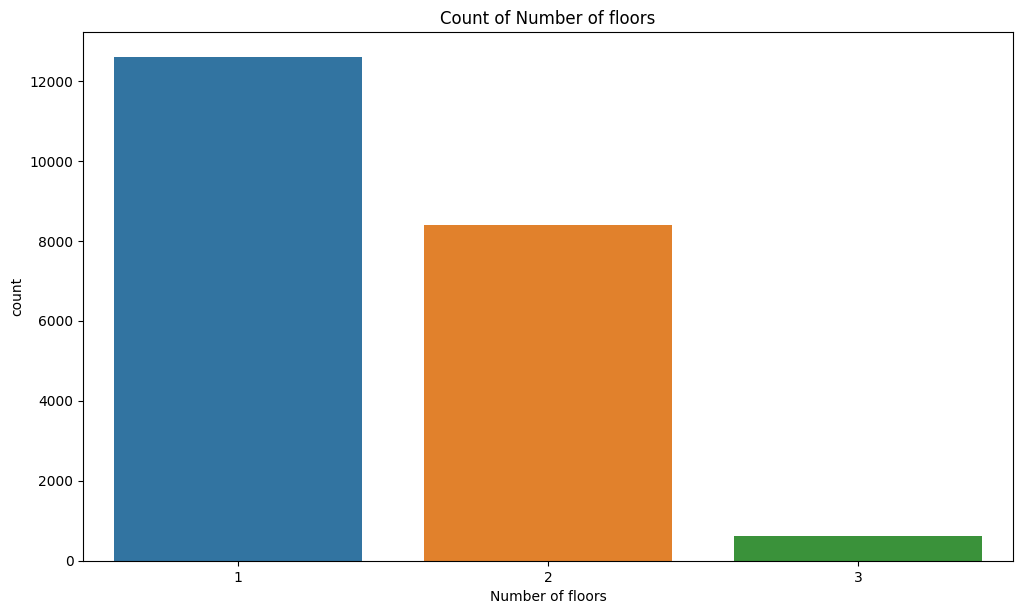

In [62]:
# histogram showing the number of floors
plt.figure(figsize = (12,7), dpi = 100)
sns.countplot(house['floors'])
plt.xlabel('Number of floors')
plt.ylabel('count')
plt.title('Count of Number of floors')
print(house.floors.value_counts())

most houses have just one floor, followed by houses with two floors and lastly 3.

7     8981
8     6068
9     2615
6     2038
10    1134
11     399
5      242
12      90
4       29
13      13
3        3
1        1
Name: grade, dtype: int64


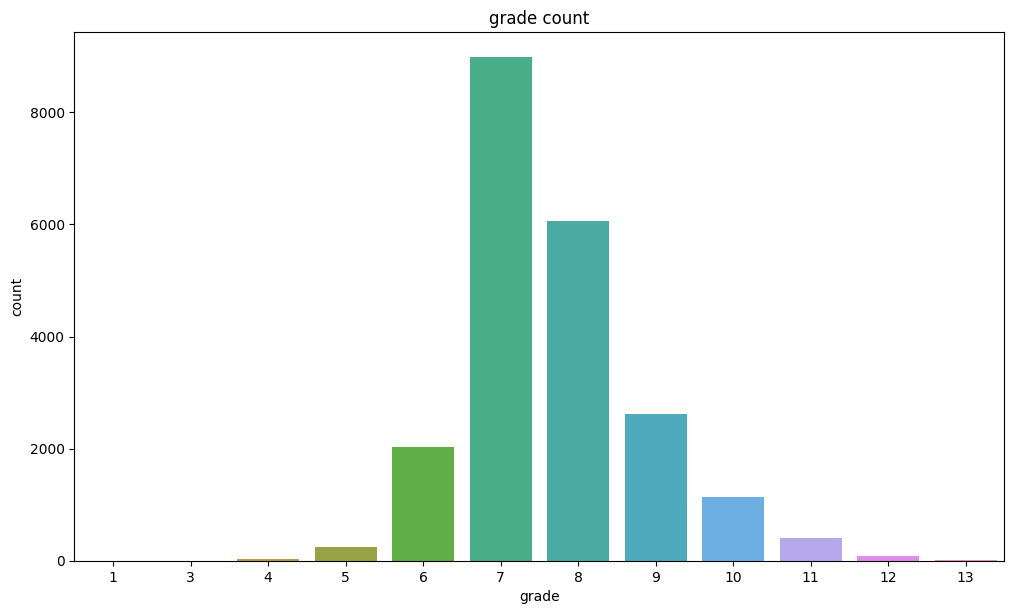

In [64]:
#histogram showing the distribution of grade
plt.figure(figsize = (12,7), dpi = 100)
sns.countplot(house['grade'])
plt.xlabel('grade')
plt.ylabel('count')
plt.title('grade count')
print(house.grade.value_counts())

most houses are grade 7 , then 8, 9 as seen above. the last is grade 1.

2    10542
1     8355
3     2228
4      338
0       86
5       48
6       12
8        2
7        2
Name: bathrooms, dtype: int64


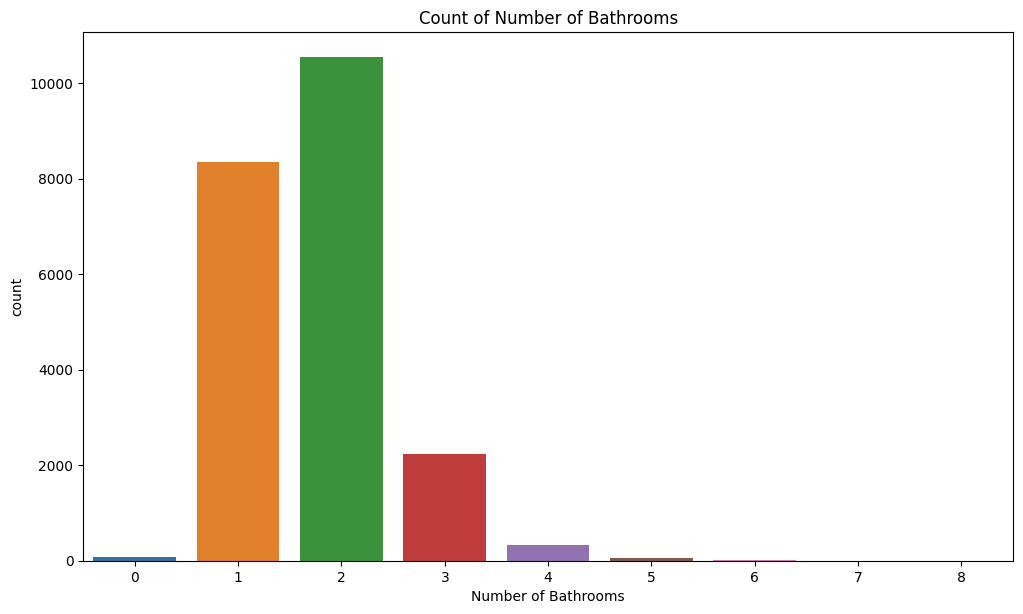

In [61]:
#histogram showing the distribution of the number of bathrooms
plt.figure(figsize = (12,7), dpi = 100)
sns.countplot(house['bathrooms'])
plt.xlabel('Number of Bathrooms')
plt.ylabel('count')
plt.title('Count of Number of Bathrooms')
print(house.bathrooms.value_counts())


most houses have  2 bathrooms, then 1 and so on as shown in the figure above. houses with bathrooms more than 6 are less and those below 1 too.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f2deb560470>],
      dtype=object)

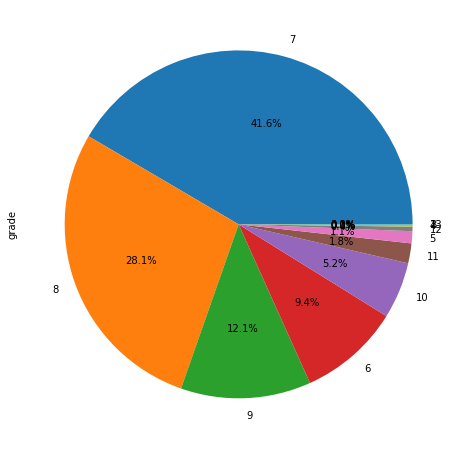

In [58]:
# check how the distribution of grade is
house.grade.value_counts().plot(kind ='pie', autopct ='%0.1f%%', figsize = (10,8), subplots = True)

grade 7 has the highest percent of 41.6 then grade 8 followed by 9 with 28.1 and 12.1 percent respectively.

Text(0.5, 1.0, 'price per the number of bedrooms')

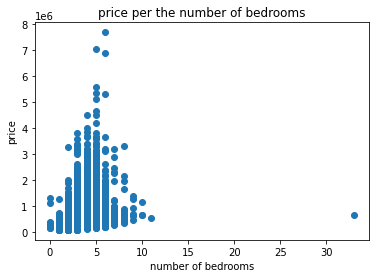

In [60]:
#scatter plot showing the relation between the price and the number of bedrooms.
#sns.countplot(x ='price', data = house, hue = 'bedrooms')
plt.scatter(house.bedrooms, house.price.values)
plt.xlabel('number of bedrooms')
plt.ylabel('price')
plt.title('price per the number of bedrooms')

the relation of price to the number of bedroom is not linearly related, but takes a steep slope, the price gets higher with some house with the same number of bedrooms.

Text(0.5, 1.0, 'price per the number of bathrooms')

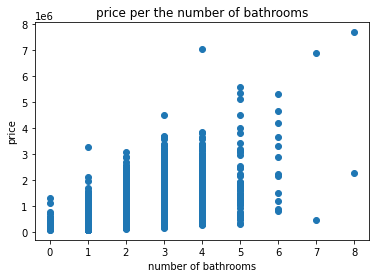

In [65]:
#scatter plot showing the relation between the price and the number of bathrooms.

plt.scatter(house.bathrooms, house.price.values)
plt.xlabel('number of bathrooms')
plt.ylabel('price')
plt.title('price per the number of bathrooms')

the relation seem linear but not entirely, some houses with many bathrooms still fetch low prices.

Text(0.5, 1.0, 'price per the number of floors')

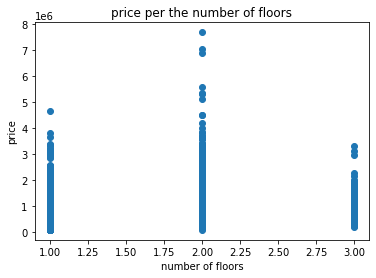

In [67]:
#scatter plot showing the relation between the price and the number of floors.
plt.scatter(house.floors, house.price.values)
plt.xlabel('number of floors')
plt.ylabel('price')
plt.title('price per the number of floors')

the relation is not linear, the prices vary independently. floors does not seem to be a major contributor to price, 2floors fetch the highest prices but have most if their prices similar across with the other number of floors.

Text(0.5, 1.0, 'price per grade')

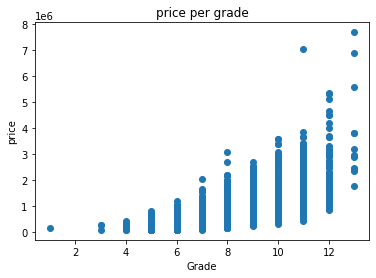

In [66]:
#scatter plot showing the relation between the price and grade.

plt.scatter(house.grade, house.price.values)
plt.xlabel('Grade')
plt.ylabel('price')
plt.title('price per grade')

the relation seem linearly related but not entirely, some houses are of higher grade but still have a low price. grade greater than 12 fetches the highest price .

#MODELLING

Linear Regression

In [68]:
# before modelling, we need to check correlation and multicollinearity
corr = house.corr()
corr

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode
price,1.000000,0.308338,0.510082,0.702044,0.089655,0.237207,0.266331,0.397346,0.036392,0.667463,0.605566,0.323837,0.053982,0.126442,-0.053168
bedrooms,0.308338,1.000000,0.467452,0.576671,0.031703,0.155643,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,0.154178,0.018841,-0.152668
bathrooms,0.510082,0.467452,1.000000,0.697875,0.085310,0.484822,0.058798,0.177257,-0.126016,0.606631,0.639933,0.250880,0.433647,0.060436,-0.159773
sqft_living,0.702044,0.576671,0.697875,1.000000,0.172826,0.353321,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,-0.199430
sqft_lot,0.089655,0.031703,0.085310,0.172826,1.000000,-0.008951,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.053080,0.007644,-0.129574
floors,0.237207,0.155643,0.484822,0.353321,-0.008951,1.000000,0.019640,0.024658,-0.293173,0.472608,0.517913,-0.235836,0.578619,-0.007775,-0.096743
waterfront,0.266331,-0.006582,0.058798,0.103818,0.021604,0.019640,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,0.030285
view,0.397346,0.079532,0.177257,0.284611,0.074710,0.024658,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.084827
condition,0.036392,0.028472,-0.126016,-0.058753,-0.008958,-0.293173,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618,0.003026
grade,0.667463,0.356967,0.606631,0.762704,0.113621,0.472608,0.082775,0.251321,-0.144674,1.000000,0.755923,0.168392,0.446963,0.014414,-0.184862


the correlation of a variable to itself is 1, on the diagonal. price and sqft_living is strongly correlated with a 0.7. sqrt_living and sqft_above are strongly correlated with 0.87. 
a correlation of above 0.25 indicates strong correlation,
below 0.5 means a weak or no correlation.

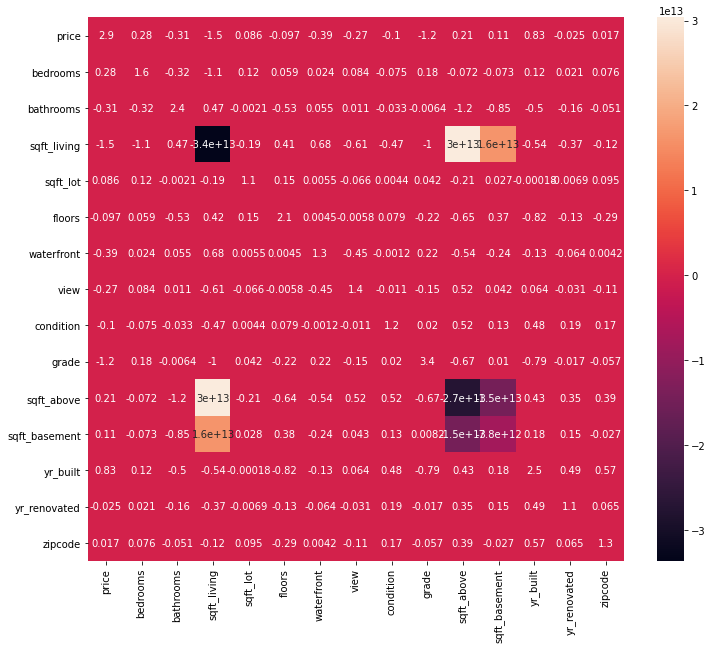

In [75]:
# check for multicollinearity using the vif
vif = pd.DataFrame(np.linalg.inv(corr.values), index = corr.index, columns = corr.columns)
# we display this using a heatmap
plt.figure(figsize = (12,10))
sns.heatmap(vif, annot = True)

if the VIF score is around 5, that indicates relatively high multicolinearity with one or more variables. sqft_living ,sqft_above and sqft_basement have high multicolinearity.

In [9]:
#we can drop the columns that are highly correlated
house1 = house.drop(columns =['sqft_living','sqft_basement'])
house1

,price,bedrooms,bathrooms,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode
0,221900.0,3,1,5650,1,0,0,3,7,1180,1955,0,98178
1,538000.0,3,2,7242,2,0,0,3,7,2170,1951,1991,98125
2,180000.0,2,1,10000,1,0,0,3,6,770,1933,0,98028
3,604000.0,4,3,5000,1,0,0,5,7,1050,1965,0,98136
4,510000.0,3,2,8080,1,0,0,3,8,1680,1987,0,98074
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2,1131,3,0,0,3,8,1530,2009,0,98103
21609,400000.0,4,2,5813,2,0,0,3,8,2310,2014,0,98146
21610,402101.0,2,0,1350,2,0,0,3,7,1020,2009,0,98144
21611,400000.0,3,2,2388,2,0,0,3,8,1600,2004,0,98027


Training the Model

In [10]:
# we split our dataset to train and test sets
X = house1.drop(columns=['price'])
y = house1['price']

from sklearn.model_selection import train_test_split
X_train, X_test , y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 100)

from sklearn.linear_model import LinearRegression
# fit the sets to a regression model
reg = LinearRegression()
reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [11]:
# check the model coefficients
coeff_ = pd.DataFrame(reg.coef_ ,X.columns,columns=['Coefficient'])
coeff_

,Coefficient
bedrooms,-14734.214019
bathrooms,98683.886582
sqft_lot,-0.210505
floors,-20101.967516
waterfront,580293.874957
view,59619.365550
condition,28094.150286
grade,150584.149640
sqft_above,114.445719
yr_built,-3782.996398


from what we see above, the number of bedrooms, the size of the parking lot, the number of floors and the year built are not the greatest contributors to the price.

In [12]:
# making the prediction and assessing the model
y_pred = reg.predict(X_test)
# we compare the actual and the predicted values
df = pd.DataFrame({'Actual': y_test,'Predicted':y_pred})

df1 = df.head(15)
df1

,Actual,Predicted
19836,285000.0,351650.450053
10442,239950.0,419374.555796
20548,460000.0,656051.887140
11014,397500.0,446236.660394
4138,545000.0,497073.830609
16623,369950.0,443089.328075
17984,351000.0,214869.419983
17526,594000.0,409515.641154
18499,550000.0,369990.993739
20918,420000.0,261683.438466


from our prediction, nothing seem to be closer to the actaul value, a sign of the most not being accurate.

In [13]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [14]:
# assess the accuracy of the model
RMSE =np.sqrt(mean_squared_error(y_test,y_pred))
MAE= metrics.mean_absolute_error(y_test,y_pred)
MSE = metrics.mean_squared_error(y_test,y_pred)
print('Mean Absolute Error:', MAE)
print('Mean Squared Error:', MSE)
print('Root Mean Squared Error:',RMSE)


Mean Absolute Error: 146004.21389470834
Mean Squared Error: 51287968479.55181
Root Mean Squared Error: 226468.4712703996


we have an MAE of 146004.2138, MSE OF 51287968479.55181 and RMSE OF 226468.471270.

In [15]:
#checking for the accuraacy of the model, use 10% of the mean
mean_percent = 0.1*house1.price.mean()
print('ten percent of the mean price is:', mean_percent)


ten percent of the mean price is: 54018.21587933188


our RMSE is significantly greater than the 10% of the mean, this means model is inaccurate.

Residual plots and Heteroscedasticity Test

In [18]:
#get the residuals from subtracting the test value from the predicted value
residual = np.subtract(y_pred,y_test)
abs(residual.mean())

2429.1848203917357

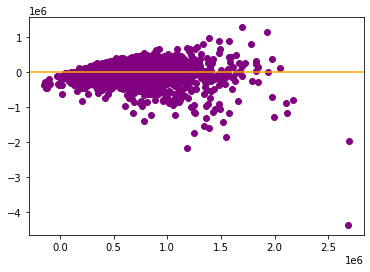

In [94]:
#plotting a scatter plot for the residuals
plt.scatter(y_pred,residual,color='purple')
plt.figsize = [10,8]
plt.axhline(y=residual.mean(),color= 'orange')
plt.show()

our residual plot takes a cone shape, the plots are centered around 0. we check for heterscedasticity.

In [19]:
#test heterscedasticity using bartlett's test
import scipy as sp
test_result, p_value=sp.stats.bartlett(y_pred,residual)
print('test result:',test_result)
print('p_value',p_value)
# compute the critical value of the chi_squared distribution
freedom = len(y_pred)-1
p1_value= 1-p_value
critical_value = sp.stats.chi2.ppf(p1_value, freedom)
print(critical_value)

test result: 235.47960246460215
p_value 3.8053299852263374e-53
inf


we compare the test result to the critical value, if the critical value is less that the tesr value we have to reassess our model.

In [97]:
if (test_result > critical_value):
  print("The variances are heterogeneous. reassess the model.")
else:
  print("The variances are homogeneous. The model passes the test.")

The variances are homogeneous. The model passes the test.


In [16]:
from sklearn.metrics import r2_score

r2_score(y_test,y_pred)

0.6199475861753407

61% accuracy is not really bad, but the model is not the best. we try prediction using another model.

#Quantile Regression

it is used when outliers are present in the data, skewed and has heteroscedasticity


In [20]:
#checking if the data type is float for our dependent variable price
house.price.dtype
# ensure we have no zeros in the column
house.loc[house.price== 0.0]

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode


the data type is float and we have no zeros in the column

In [21]:
# we check for repeated values
house.price.value_counts().head(15)

450000.0    172
350000.0    172
550000.0    159
500000.0    152
425000.0    150
325000.0    148
400000.0    145
375000.0    138
300000.0    133
525000.0    131
250000.0    130
475000.0    120
330000.0    119
650000.0    117
275000.0    113
Name: price, dtype: int64

our dataset has so many repeated values. our data does not meet this requirement, but we have no zeros and it is continuous, we can use quantile.

In [22]:
# determining our dependent and independent variable
R = house[['bedrooms', 'bathrooms','sqft_living','sqft_lot','floors','waterfront','view','condition','grade','yr_built',
           'yr_renovated','zipcode']]
s = house['price']
R_train,R_test, s_train,s_test = train_test_split(R,s, test_size=0.2,random_state=30)

In [23]:
import statsmodels.formula.api as smf
model = smf.quantreg('s ~ R', house)
res = model.fit(q = 0.5)
print(res.summary())


                         QuantReg Regression Results                          
Dep. Variable:                      s   Pseudo R-squared:               0.3945
Model:                       QuantReg   Bandwidth:                   2.439e+04
Method:                 Least Squares   Sparsity:                    3.314e+05
Date:                Sat, 01 Aug 2020   No. Observations:                21613
Time:                        07:15:44   Df Residuals:                    21600
                                        Df Model:                           12
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -6.2040      1.056     -5.873      0.000      -8.275      -4.133
R[0]        -2.66e+04   1537.741    -17.296      0.000   -2.96e+04   -2.36e+04
R[1]        3.415e+04   2359.527     14.473      0.000    2.95e+04    3.88e+04
R[2]         121.4966      2.436     49.873      0.0

/usr/local/lib/python3.6/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)


we have numerical problems and presence of multicolinearity in our data, we can,t say much about our model.

#RIDGE REGRESSION

In [24]:

# use linear regression as our baseline model
reg= LinearRegression()
reg.fit(X,y)
linear_model = (mean_squared_error(y_true=y,y_pred =reg.predict(X)))
print('linear model MSE:',linear_model)

linear model MSE: 49890560212.157524


In [25]:
#we need to determine the most appropriate variables for our l2 regularisation
# we first create our ridge model and indicate normalisation
from sklearn.linear_model import Ridge
ridge= Ridge(normalize=True)


In [28]:
#we then set up a grid search
# we want the log -5 to 2, but get 8 values.
#cv is the number of folds for the cross validation.
from sklearn.model_selection import GridSearchCV
search = GridSearchCV(estimator=ridge, param_grid={'alpha':np.logspace(-5,2,8)}, scoring='neg_mean_squared_error',n_jobs=1,refit=True,cv=10)

In [29]:
#we now fit our model and get the best params
search.fit(X,y)
search.best_params_

{'alpha': 0.01}

best params tells us what to set alpha to. in this case 0.01

In [30]:
#searching for the best score
abs(search.best_score_)

50403513867.28022

the best score tells us what the best possible mean squared error is.we compare this to our baseline score. the value is bigger than the baseline score.

In [31]:
#we now confirm by fitting our model with ridge information and finding the mean squared error
ridge =   Ridge(normalize =True, alpha = 0.01)
ridge.fit(X,y)
ridge_model = (mean_squared_error(y_true=y,y_pred=ridge.predict(X)))
print(ridge_model)

49899547834.3958


the results show a slight difference in MSE. baseline model is slightly lower than grid search  and slight difference with the baseline model.

In [32]:
# Making predictions using ridge regression

y_pred = ridge.predict(X_test)
y_pred

predicted_ridge = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

predicted_ridge.head()

,Actual,Predicted
19836,285000.0,357826.139537
10442,239950.0,418134.967514
20548,460000.0,656580.149771
11014,397500.0,467436.556810
4138,545000.0,494249.274499


the actual and predicted are not close to similar but the difference is smaller than the linear regression model prediction. our model is better than the linear regression model.

In [38]:
#use the r2 to check the accuracy of the model.
r2_score(y_test,y_pred)

0.6217409295736871

our r2 score accuracy has gone up to 62%, a good sign that our model is better

#LASSO REGRESSION

In [33]:
# we first standardize the data using the scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = house.drop(columns=['price'])
y = house['price']
x_scaled = scaler.fit_transform(X)

In [37]:
# we now create our lasso model
#importing the linear models
from sklearn import linear_model
from sklearn.linear_model import Lasso
 #we create our lasso object
lasso = linear_model.Lasso()
# fitting the models
lasso.fit(X,y)
# printing the scores,MSE, and coefficients
print('lasso score:', lasso.score(X,y))
print('lasso MSE:', mean_squared_error(y,lasso.predict(X)))
print('lasso coef:',lasso.coef_)

lasso score: 0.6542312811132839
lasso MSE: 46661061635.6575
lasso coef: [-3.81512618e+04  5.35380668e+04  3.05923544e+02 -2.62336109e-01
  2.23425141e+04  5.75936982e+05  4.53500257e+04  1.95596415e+04
  1.25174349e+05 -1.37928408e+02 -1.35471315e+02 -3.58502893e+03
  7.90042919e+00 -4.14024960e+01]


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 462891207840255.0, tolerance: 291664766083.6765
  positive)


our MSE is smaller compared to the above two models we have used.

In [39]:
#splitting the data into train and test and regularizing
#choosing the regularization parameter with the help of GridSearch
# the parameter with the highest R-squared will give us the best parameters
# we import the necessary libraries
import warnings
warnings.filterwarnings('ignore')
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=100)
parameters ={'alpha':np.concatenate((np.arange(0.1,2,0.1),np.arange(2,5,0.5),np.arange(5,25,1)))}
linear =  linear_model.LinearRegression()
lasso = linear_model.Lasso()
gridlasso = GridSearchCV(lasso,parameters,scoring='r2')
#fitting the models and print the best parameters,R-squared scored,MSE,and coefficients
gridlasso.fit(X_train,y_train)
linear.fit(X_train, y_train)
print('lasso best parameters:',gridlasso.best_params_)
print('lasso score:',gridlasso.score(X_test,y_test))
print("linear score:", linear.score(X_test, y_test)) 
print("lasso MSE:", mean_squared_error(y_test, gridlasso.predict(X_test)))
print("linear MSE:", mean_squared_error(y_test, linear.predict(X_test))) 
print("lasso best estimator coef:", gridlasso.best_estimator_.coef_)
print("linear coef:", linear.coef_)



lasso best parameters: {'alpha': 0.1}
lasso score: 0.6537501627857936
linear score: 0.6537500529066931
lasso MSE: 46726320084.06396
linear MSE: 46726334912.21829
lasso best estimator coef: [-3.70659420e+04  5.91302064e+04  3.03956082e+02 -2.41094778e-01
  2.12146936e+04  5.87047509e+05  4.35597682e+04  2.08777840e+04
  1.26115053e+05 -1.39138165e+02 -1.41482673e+02 -3.65821088e+03
 -2.29043773e+00 -1.36866093e+01]
linear coef: [-3.70660548e+04  5.91305623e+04  1.09096939e+02 -2.41093908e-01
  2.12152121e+04  5.87062126e+05  4.35591981e+04  2.08780741e+04
  1.26115208e+05  5.57205633e+01  5.33763752e+01 -3.65821677e+03
 -2.29069174e+00 -1.36877242e+01]


our lasso best parameter is an alpha of 0.1, different from ridge that was 0. our lasso MSE is smaller compared to that of our baseline model. 

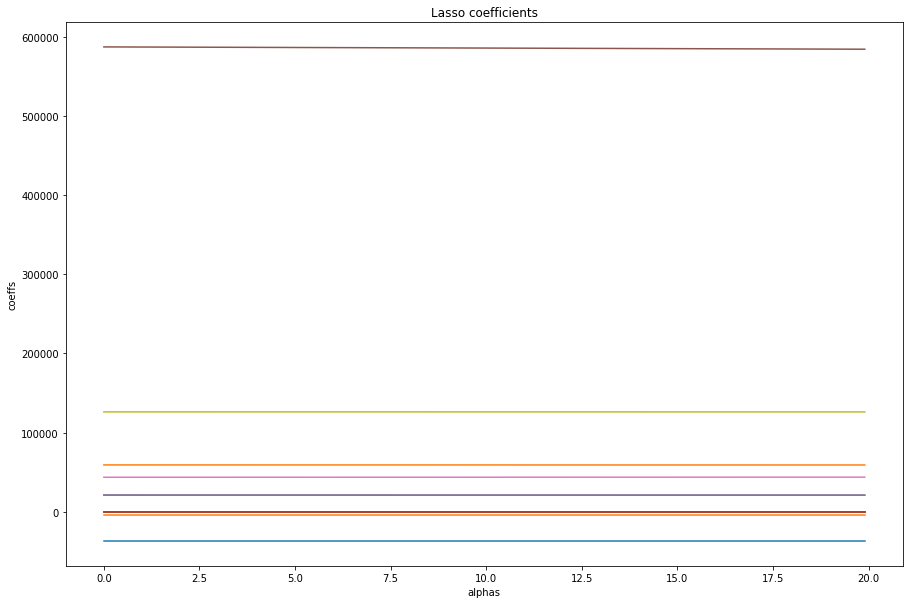

In [42]:
# Importing library for visualization

lasso_coeffs = []
# building Lasso for 200 values of alpha and storing the resulting coefficients in our list
lasso_alphas = np.arange(0, 20, 0.1) 
for i in range(200):
    lasso = Lasso(alpha = lasso_alphas[i])
    lasso.fit(X_train, y_train)
    lasso_coeffs.append(lasso.coef_)
# visualizing the Lasso coefficient plots 
plt.figure(figsize = (15,10))
plt.plot(lasso_alphas, lasso_coeffs)
plt.title('Lasso coefficients')
plt.xlabel('alphas')
plt.ylabel('coeffs')

plt.show()

In [43]:
#using lasso regression to predict
y_pred = gridlasso.predict(X_test)

In [44]:
predicted_lasso = pd.DataFrame({'Actaul':y_test,'Predicted':y_pred})
predicted_lasso.head()

,Actaul,Predicted
19836,285000.0,390992.584764
10442,239950.0,402773.552435
20548,460000.0,639133.725511
11014,397500.0,414105.696564
4138,545000.0,481949.184757


the values are not close but they are better than the previous model

In [45]:
# checking thw accuracy
r2_score(y_test,y_pred)

0.6537501627857936

our accuracy is 65%, this makes the model better than the previous. we almost achieving our metric of success.

#ELASTIC NET REGRESSION

In [47]:
# importing the libraries we will need
from sklearn.linear_model import ElasticNet


In [48]:
#setting our data
X = house.drop(columns=['price'])
y = house['price']

In [49]:
# Creating our linear regression model for the purpose of comparison
# 
regression=LinearRegression()
regression.fit(X,y)
first_model=(mean_squared_error(y_true=y,y_pred=regression.predict(X)))
print(first_model)

46661061474.13968


In [50]:
# the coefficients of the model. We use a for loop to go through 
# the model and the zip function to combine the two columns.
# 
coef_dict_baseline = {}
for coef, feat in zip(regression.coef_,X.columns):
    coef_dict_baseline[feat] = coef
coef_dict_baseline

{'bathrooms': 53541.560569851325,
 'bedrooms': -38152.34226161368,
 'condition': 19562.43477259463,
 'floors': 22347.662441483204,
 'grade': 125176.02041325455,
 'sqft_above': 55.17688453350456,
 'sqft_basement': 57.637094894505026,
 'sqft_living': 112.81397931017636,
 'sqft_lot': -0.26232764682208654,
 'view': 45344.46571338211,
 'waterfront': 576089.8085444637,
 'yr_built': -3585.088681682417,
 'yr_renovated': 7.897794407387153,
 'zipcode': -41.41276323290447}

In [51]:
# Elastic Net Model
# Elastic net requires normalize data. 
# we set inside the ElasticNet function. 
# then create our grid.
# 
elastic=ElasticNet(normalize=True)
search=GridSearchCV(estimator=elastic,param_grid={'alpha':np.logspace(-5,2,8),'l1_ratio':[.2,.4,.6,.8]},scoring='neg_mean_squared_error',n_jobs=1,refit=True,cv=10)

In [52]:
# We will now fit our model and display the best parameters and the best results we can get with that setup.
# 
search.fit(X,y)
search.best_params_
abs(search.best_score_)

47210302628.4561

our best score is higher than the previous models.

In [53]:

# 
elastic=ElasticNet(normalize=True,alpha=0.001,l1_ratio=0.75)
elastic.fit(X,y)
second_model=(mean_squared_error(y_true=y,y_pred=elastic.predict(X)))
print(second_model)

85866627023.31851


In [54]:
# Below are the coefficients
# 
coef_dict_baseline = {}
for coef, feat in zip(elastic.coef_,X.columns):
    coef_dict_baseline[feat] = coef
coef_dict_baseline


{'bathrooms': 25708.678213694264,
 'bedrooms': 10065.17884783175,
 'condition': 5505.800575059834,
 'floors': 13083.62729377225,
 'grade': 24021.756543434552,
 'sqft_above': 29.042045562089978,
 'sqft_basement': 31.70125864819597,
 'sqft_living': 30.970375496581052,
 'sqft_lot': 0.06366294100594931,
 'view': 22904.707660365013,
 'waterfront': 145659.22908669186,
 'yr_built': -107.8473799313584,
 'yr_renovated': 14.831957850803587,
 'zipcode': -3.7466812082879293}

the coefficients have a great difference. the model is not the best.

In [55]:
# predicting the price and comparing to the actual

y_pred=elastic.predict(X_test)

y_pred

predicted_elastic = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

predicted_elastic.head()

,Actual,Predicted
19836,285000.0,540370.277282
10442,239950.0,497217.893580
20548,460000.0,588510.525526
11014,397500.0,480694.042319
4138,545000.0,580174.405575


the prediction is twice the actual, this is not the best model to use.

In [56]:
# Determning accuracy of the model usng R2 score

r2_score(y_test,y_pred)

0.36712507252294047

the accuracy is below 50%, makes elastic net not a suitable model.

RECOMMENDATIONS 
lasso regression has the highest accuracy score, this makes it our suitable model to use for prediction. this is the ideal to use to determine the factors of price and predict the price.